In [5]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import importlib
import os
import rootutils

rootutils.setup_root(os.getcwd(), indicator=".project-root", pythonpath=True)


# Add the parent directory of 'utils' to the Python path
sys.path.append(
    "/Users/rafnuss/Library/CloudStorage/Box-Box/defile-migration-forecast/"
)

# Now import the module
from src.data.get_era5 import *
from src.data import data_transformer

importlib.reload(data_transformer)
from src.data.data_transformer import DataTransformer, Transformer

In [154]:
data_dir = "../data/"
species = "Common Buzzardd"
era5_main_location = "Defile"
era5_main_variables = [
    "temperature_2m",
    "total_precipitation",
    "surface_pressure",
    "u_component_of_wind_10m",
    "v_component_of_wind_10m",
]
era5_hourly_locations = [
    "MontTendre",
    "Chasseral",
    "Basel",
    "Dijon",
    "ColGrandSaintBernard",
]
era5_hourly_variables = [
    "temperature_2m",
    "total_precipitation",
    "surface_pressure",
    "u_component_of_wind_10m",
    "v_component_of_wind_10m",
]
era5_daily_locations = [
    "Defile",
    "Schaffhausen",
    "Basel",
    "Munich",
    "Stuttgart",
    "Frankfurt",
    "Berlin",
]
era5_daily_variables = [
    "temperature_2m",
    "total_precipitation",
    "surface_pressure",
    "u_component_of_wind_10m",
    "v_component_of_wind_10m",
]
years = range(1966, 2023)
lag_day = 7
transform = False

In [ ]:
# HOURLY ERA-5 DATA ----------------------------
era5_main = get_era5_hourly(
    data_dir, locations=era5_main_location, variables=era5_main_variables, add_sun=True
)

# HOURLY ERA-5 DATA ----------------------------
era5_hourly = get_era5_hourly(
    data_dir,
    locations=era5_hourly_locations,
    variables=era5_hourly_variables,
    add_sun=True,
)

# DAILY ERA-5 DATA ----------------------------
era5_daily = get_era5_daily(
    data_dir,
    locations=era5_daily_locations,
    variables=era5_daily_variables,
    lag_day=lag_day,
)

In [155]:
trans_daily = DataTransformer(dataset=era5_daily)
trans_daily.apply_transformers(era5_daily)

trans_daily.export()

transformer_with_params = DataTransformer(transformers=transformers)

DataTransformer({'temperature_2m': Transformer(type:standardization, params:(373131863568624.75, 1.0625)), 'total_precipitation': Transformer(type:log_transform, params:(2.2801464823619537, 0.0015418435598078281)), 'surface_pressure': Transformer(type:standardization, params:(473833790809367.4, 1.1875)), 'u_component_of_wind_10m': Transformer(type:minmax_normalization, params:(0.0, 1.0)), 'v_component_of_wind_10m': Transformer(type:minmax_normalization, params:(0.0, 1.0))})


In [137]:
datatransformer = DataTransformer()
datatransformer.compute_transformers(era5_daily)

datatransformer = DataTransformer(dataset=era5_daily)

era5_daily_trans = datatransformer.apply_transformers(era5_daily)

print(datatransformer)

transformers = datatransformer.export()

# Example of initializing with precomputed parameters
transformer_with_params = DataTransformer(transformers=transformers)

# Apply transformations using precomputed parameters
transformer_with_params.apply_transformers(era5_daily)

DataTransformer({'temperature_2m': Transformer(type:standardization, params:(1652857551901941.0, 3.0)), 'total_precipitation': Transformer(type:log_transform, params:(-0.21687115183511016, 0.013547373895856788)), 'surface_pressure': Transformer(type:standardization, params:(8884383577676959.0, 20.0)), 'u_component_of_wind_10m': Transformer(type:minmax_normalization, params:(0.0, 1.0)), 'v_component_of_wind_10m': Transformer(type:minmax_normalization, params:(0.0, 1.0))})
No transformation or parameters found for temperature_2m. Skipping...
No transformation or parameters found for total_precipitation. Skipping...
No transformation or parameters found for surface_pressure. Skipping...
No transformation or parameters found for u_component_of_wind_10m. Skipping...
No transformation or parameters found for v_component_of_wind_10m. Skipping...


In [83]:
transformer_with_params

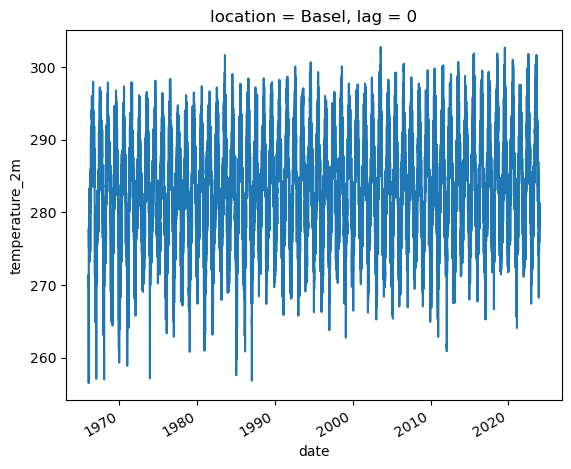

In [35]:
era5_daily.sel(location="Basel", lag=0)["temperature_2m"].plot.line(x="date")

(array([  26.,  101.,  532., 2753., 4135., 3816., 4296., 3762., 1595.,
         162.]),
 array([256.52949651, 261.15124264, 265.77298876, 270.39473489,
        275.01648102, 279.63822714, 284.25997327, 288.8817194 ,
        293.50346553, 298.12521165, 302.74695778]),
 <BarContainer object of 10 artists>)

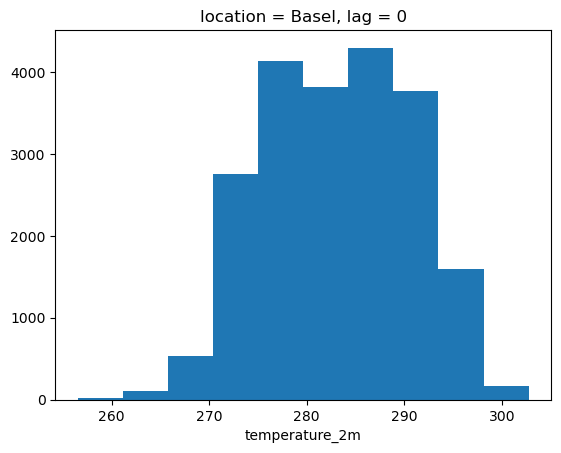

In [36]:
era5_daily.sel(location="Basel", lag=0)["temperature_2m"].plot.hist()